### 3.4.1 学習コードの実装

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_cbow.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any,Any}("say" => 2,"goodbye" => 3,"you" => 1,"hello" => 6,"." => 7,"and" => 4,"i" => 5), Dict{Any,Any}(7 => ".",4 => "and",2 => "say",3 => "goodbye",5 => "i",6 => "hello",1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_contexts_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32,3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleCBOW(MatMul([[-0.012754566628366886 0.01002912071960766 … 0.0012070111409272972 -0.004893851517996221; -0.001287748934458822 0.015899685432478067 … -0.007103237888626026 -0.005207678453808356; … ; -0.002918986584853095 -0.0006132091852569787 … -0.014879080564643503 0.020171141053745876; 0.008630112472914848 -0.010849065992523601 … -0.008563341548779054 0.005303497807580057]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.012754566628366886 0.01002912071960766 … 0.0012070111409272972 -0.004893851517996221; -0.001287748934458822 0.015899685432478067 … -0.007103237888626026 -0.005207678453808356; … ; -0.002918986584853095 -0.0006132091852569787 … -0.014879080564643503 0.020171141053745876; 0.008630112472914848 -0.010849065992523601 … -0.008563341548779054 0.005303497807580057]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[0.0038599413445483937 0.00283186708753

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 5.84
| epoch 0 | iter 2 / 2 | loss 5.84
| epoch 10 | iter 2 / 2 | loss 5.84
| epoch 20 | iter 1 / 2 | loss 5.83
| epoch 20 | iter 2 / 2 | loss 5.83
| epoch 30 | iter 2 / 2 | loss 5.82
| epoch 40 | iter 1 / 2 | loss 5.8
| epoch 40 | iter 2 / 2 | loss 5.77
| epoch 50 | iter 2 / 2 | loss 5.76
| epoch 60 | iter 1 / 2 | loss 5.72
| epoch 60 | iter 2 / 2 | loss 5.7
| epoch 70 | iter 2 / 2 | loss 5.63
| epoch 80 | iter 1 / 2 | loss 5.56
| epoch 80 | iter 2 / 2 | loss 5.45
| epoch 90 | iter 2 / 2 | loss 5.49
| epoch 100 | iter 1 / 2 | loss 5.31
| epoch 100 | iter 2 / 2 | loss 5.27
| epoch 110 | iter 2 / 2 | loss 5.24
| epoch 120 | iter 1 / 2 | loss 4.99
| epoch 120 | iter 2 / 2 | loss 5.13
| epoch 130 | iter 2 / 2 | loss 4.73
| epoch 140 | iter 1 / 2 | loss 4.76
| epoch 140 | iter 2 / 2 | loss 4.75
| epoch 150 | iter 2 / 2 | loss 4.5
| epoch 160 | iter 1 / 2 | loss 4.52
| epoch 160 | iter 2 / 2 | loss 4.75
| epoch 170 | iter 2 / 2 | loss 4.29
| epoch 180 | iter 1 

In [7]:
using Plots
gr()

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


Plots.GRBackend()

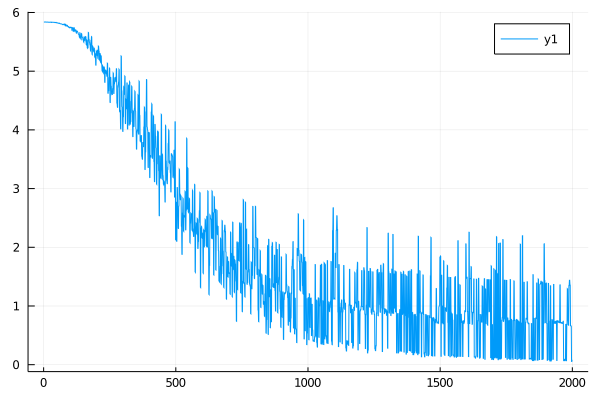

In [8]:
plot(trainer.loss_list)

#### MatMulレイヤの重みを表示

In [9]:
for (word_id, word) = id_to_word
    println("$(word) $(model.word_vecs[word_id, :])")
end

. [0.008630112472914848, -0.010849065992523601, 0.01662328331906617, -0.008563341548779054, 0.005303497807580057]
and [-0.00018351796247275662, 0.015879295344475387, -0.0002756614130685519, 0.00570538948126307, 0.0044937254574150725]
say [-0.001287748934458822, 0.015899685432478067, 0.011405282392619986, -0.007103237888626026, -0.005207678453808356]
goodbye [-0.011257549428831599, 0.010020938396560371, 1.891233326982951e-5, 0.0016775858624727116, -0.0054519897685021655]
i [0.0010705386758341395, 0.0009666239741418181, -0.005968662442820585, 0.01774668200084694, 0.003637407940133335]
hello [-0.002918986584853095, -0.0006132091852569787, -0.0036675573212836955, -0.014879080564643503, 0.020171141053745876]
you [-0.012754566628366886, 0.01002912071960766, 0.008799872586614283, 0.0012070111409272972, -0.004893851517996221]
